# CAR SALES FORECAST WITH MULTI-LAYER PERCEPTRON
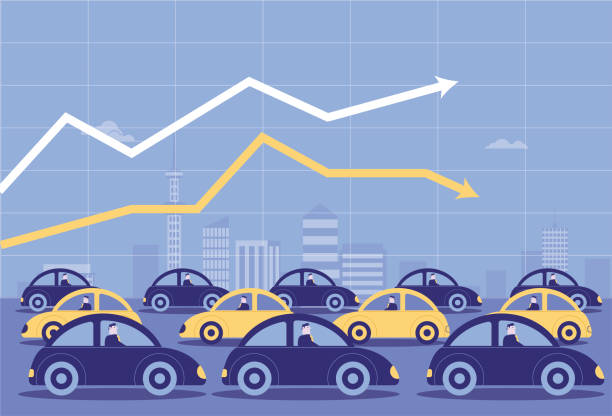

## This dataset contains the number of vehicle sales realized in a certain period. The number of sales was kept for every month. We will forecast sales numbers for the next 6 months using MLP.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt;
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2022-10-09 21:14:19.515300: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-09 21:14:19.515427: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df_cars = pd.read_csv('sales-cars.csv')

Let's see how our dataset looks like.

In [3]:
df_cars.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In this part, we convert the Month column of the data to date format.

In [4]:
df_cars.index = pd.to_datetime(df_cars.Month, format='%Y-%m')

In [5]:
df_cars = df_cars.resample("M").sum()

In [6]:
df_cars.head()

,Sales
Month,
2016-01-31,266
2016-02-29,146
2016-03-31,183
2016-04-30,119
2016-05-31,180


The sales chart is as follows.

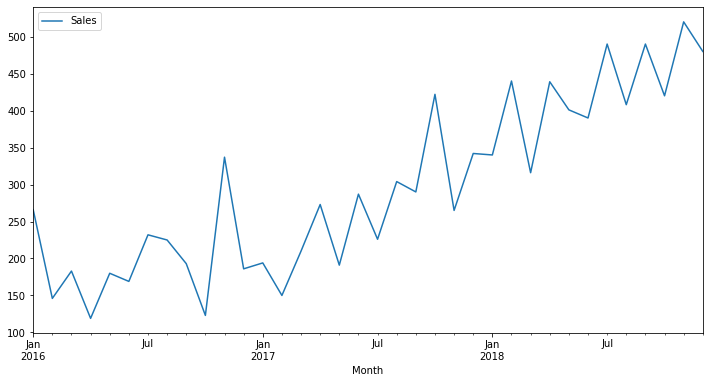

In [7]:
df_cars.plot(figsize=(12,6));

In [8]:
# Seasonal Decompose

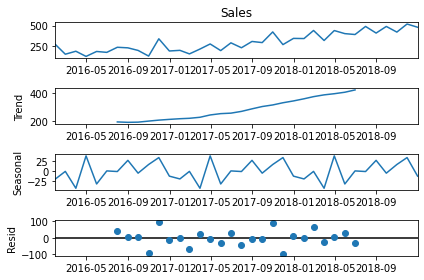

In [9]:
results = seasonal_decompose(df_cars['Sales'])
results.plot();

**We want to forecast for the next 6 months. However, we will not be able to see how successful the results we produced are, as we do not have actual sales data to compare our predicted results with. Therefore, to measure the success of the forecast, I set aside the last 6 months of the data as test data. I leave the rest as a train. We will predict the next 6 months from the train data and compare it with the real values in the test data.**

In [10]:
# Train Test Split
train = df_cars[:-6]
test = df_cars[-6:]

In [11]:
train.head()

,Sales
Month,
2016-01-31,266
2016-02-29,146
2016-03-31,183
2016-04-30,119
2016-05-31,180


In [12]:
test.head()

,Sales
Month,
2018-07-31,490
2018-08-31,408
2018-09-30,490
2018-10-31,420
2018-11-30,520


In [13]:
# Generate Lags

In [14]:
def generate_lag(df, n):
    X, y = [], []
    for i in range(len(df) - n):
        X.append(df[i:i+n])
        y.append(df[n+i])
    
    return np.array(X), np.array(y), np.array(y[-n:]).reshape(1,n)

In [15]:
X, y, last_batch_values = generate_lag(train.Sales.values, 12)

In [16]:
X

array([[266, 146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186],
       [146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194],
       [183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150],
       [119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210],
       [180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273],
       [169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191],
       [232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287],
       [225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226],
       [193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304],
       [123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290],
       [337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422],
       [186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265],
       [194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342],
       [150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340],
       [210, 273, 191, 287, 226, 3

In [17]:
y

array([194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340,
       440, 316, 439, 401, 390])

In [18]:
last_batch_values

array([[226, 304, 290, 422, 265, 342, 340, 440, 316, 439, 401, 390]])

In [19]:
# Build Model 

# Build the Model

In [20]:
def mlp_model(input_, y_, epochs=1000):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=input_.shape[1]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    print(model.fit(input_, y_, epochs=epochs))
    return model

In [21]:
model = mlp_model(X,y, epochs=3000)
model

2022-10-09 21:14:23.873334: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-09 21:14:23.873366: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-09 21:14:23.873390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sandeep-Lenovo-ideapad-110-15ISK): /proc/driver/nvidia/version does not exist
2022-10-09 21:14:23.873587: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/3000
1/1 [==============================] - 0s 401ms/step - loss: 81994.1094
Epoch 2/3000
1/1 [==============================] - 0s 5ms/step - loss: 71318.3594
Epoch 3/3000
1/1 [==============================] - 0s 9ms/step - loss: 61550.1797
Epoch 4/3000
1/1 [==============================] - 0s 14ms/step - loss: 52644.8594
Epoch 5/3000
1/1 [==============================] - 0s 9ms/step - loss: 44562.3125
Epoch 6/3000
1/1 [==============================] - 0s 13ms/step - loss: 37324.1445
Epoch 7/3000
1/1 [==============================] - 0s 8ms/step - loss: 30872.4648
Epoch 8/3000
1/1 [==============================] - 0s 5ms/step - loss: 25196.9414
Epoch 9/3000
1/1 [==============================] - 0s 5ms/step - loss: 20266.8750
Epoch 10/3000
1/1 [==============================] - 0s 5ms/step - loss: 16047.2119
Epoch 11/3000
1/1 [==============================] - 0s 9ms/step - loss: 12498.7041
Epoch 12/3000
1/1 [==============================] - 0s 5ms/step - loss: 9607.612

1/1 [==============================] - 0s 5ms/step - loss: 2100.7734
Epoch 100/3000
1/1 [==============================] - 0s 6ms/step - loss: 2092.9028
Epoch 101/3000
1/1 [==============================] - 0s 7ms/step - loss: 2085.3984
Epoch 102/3000
1/1 [==============================] - 0s 7ms/step - loss: 2078.0127
Epoch 103/3000
1/1 [==============================] - 0s 5ms/step - loss: 2070.7854
Epoch 104/3000
1/1 [==============================] - 0s 5ms/step - loss: 2063.5674
Epoch 105/3000
1/1 [==============================] - 0s 6ms/step - loss: 2056.2334
Epoch 106/3000
1/1 [==============================] - 0s 5ms/step - loss: 2048.7832
Epoch 107/3000
1/1 [==============================] - 0s 10ms/step - loss: 2041.2534
Epoch 108/3000
1/1 [==============================] - 0s 7ms/step - loss: 2033.9987
Epoch 109/3000
1/1 [==============================] - 0s 5ms/step - loss: 2026.6842
Epoch 110/3000
1/1 [==============================] - 0s 6ms/step - loss: 2019.3920
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 1550.7826
Epoch 197/3000
1/1 [==============================] - 0s 5ms/step - loss: 1546.2443
Epoch 198/3000
1/1 [==============================] - 0s 19ms/step - loss: 1541.8586
Epoch 199/3000
1/1 [==============================] - 0s 5ms/step - loss: 1537.2410
Epoch 200/3000
1/1 [==============================] - 0s 4ms/step - loss: 1532.7515
Epoch 201/3000
1/1 [==============================] - 0s 5ms/step - loss: 1528.2526
Epoch 202/3000
1/1 [==============================] - 0s 4ms/step - loss: 1523.7523
Epoch 203/3000
1/1 [==============================] - 0s 6ms/step - loss: 1519.2990
Epoch 204/3000
1/1 [==============================] - 0s 3ms/step - loss: 1514.7833
Epoch 205/3000
1/1 [==============================] - 0s 6ms/step - loss: 1510.2687
Epoch 206/3000
1/1 [==============================] - 0s 4ms/step - loss: 1505.7997
Epoch 207/3000
1/1 [==============================] - 0s 4ms/step - loss: 1501.3329
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 1183.1504
Epoch 294/3000
1/1 [==============================] - 0s 5ms/step - loss: 1179.7463
Epoch 295/3000
1/1 [==============================] - 0s 5ms/step - loss: 1176.2936
Epoch 296/3000
1/1 [==============================] - 0s 5ms/step - loss: 1172.7766
Epoch 297/3000
1/1 [==============================] - 0s 6ms/step - loss: 1169.2822
Epoch 298/3000
1/1 [==============================] - 0s 5ms/step - loss: 1165.7659
Epoch 299/3000
1/1 [==============================] - 0s 8ms/step - loss: 1162.2156
Epoch 300/3000
1/1 [==============================] - 0s 4ms/step - loss: 1158.7074
Epoch 301/3000
1/1 [==============================] - 0s 10ms/step - loss: 1155.1879
Epoch 302/3000
1/1 [==============================] - 0s 4ms/step - loss: 1151.6840
Epoch 303/3000
1/1 [==============================] - 0s 5ms/step - loss: 1148.1931
Epoch 304/3000
1/1 [==============================] - 0s 5ms/step - loss: 1144.7166
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 847.5546
Epoch 391/3000
1/1 [==============================] - 0s 5ms/step - loss: 844.2131
Epoch 392/3000
1/1 [==============================] - 0s 3ms/step - loss: 841.0435
Epoch 393/3000
1/1 [==============================] - 0s 5ms/step - loss: 837.9167
Epoch 394/3000
1/1 [==============================] - 0s 4ms/step - loss: 834.7332
Epoch 395/3000
1/1 [==============================] - 0s 4ms/step - loss: 831.6077
Epoch 396/3000
1/1 [==============================] - 0s 6ms/step - loss: 828.3325
Epoch 397/3000
1/1 [==============================] - 0s 6ms/step - loss: 825.1160
Epoch 398/3000
1/1 [==============================] - 0s 5ms/step - loss: 821.8406
Epoch 399/3000
1/1 [==============================] - 0s 4ms/step - loss: 818.9431
Epoch 400/3000
1/1 [==============================] - 0s 6ms/step - loss: 815.4851
Epoch 401/3000
1/1 [==============================] - 0s 7ms/step - loss: 812.3932
Epoch 402/3000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 570.8050
Epoch 489/3000
1/1 [==============================] - 0s 5ms/step - loss: 568.5876
Epoch 490/3000
1/1 [==============================] - 0s 10ms/step - loss: 566.3465
Epoch 491/3000
1/1 [==============================] - 0s 4ms/step - loss: 563.9595
Epoch 492/3000
1/1 [==============================] - 0s 8ms/step - loss: 561.2629
Epoch 493/3000
1/1 [==============================] - 0s 4ms/step - loss: 559.9289
Epoch 494/3000
1/1 [==============================] - 0s 8ms/step - loss: 557.4807
Epoch 495/3000
1/1 [==============================] - 0s 5ms/step - loss: 553.9794
Epoch 496/3000
1/1 [==============================] - 0s 5ms/step - loss: 551.9755
Epoch 497/3000
1/1 [==============================] - 0s 3ms/step - loss: 549.2857
Epoch 498/3000
1/1 [==============================] - 0s 11ms/step - loss: 546.9573
Epoch 499/3000
1/1 [==============================] - 0s 5ms/step - loss: 544.9294
Epoch 500/3000
1/

1/1 [==============================] - 0s 5ms/step - loss: 371.4603
Epoch 587/3000
1/1 [==============================] - 0s 6ms/step - loss: 369.2142
Epoch 588/3000
1/1 [==============================] - 0s 8ms/step - loss: 367.6825
Epoch 589/3000
1/1 [==============================] - 0s 5ms/step - loss: 366.3537
Epoch 590/3000
1/1 [==============================] - 0s 8ms/step - loss: 364.8691
Epoch 591/3000
1/1 [==============================] - 0s 5ms/step - loss: 362.9354
Epoch 592/3000
1/1 [==============================] - 0s 6ms/step - loss: 361.8202
Epoch 593/3000
1/1 [==============================] - 0s 6ms/step - loss: 360.0870
Epoch 594/3000
1/1 [==============================] - 0s 6ms/step - loss: 358.5239
Epoch 595/3000
1/1 [==============================] - 0s 4ms/step - loss: 356.9951
Epoch 596/3000
1/1 [==============================] - 0s 8ms/step - loss: 355.3502
Epoch 597/3000
1/1 [==============================] - 0s 5ms/step - loss: 353.6246
Epoch 598/3000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 244.3416
Epoch 685/3000
1/1 [==============================] - 0s 4ms/step - loss: 243.3587
Epoch 686/3000
1/1 [==============================] - 0s 9ms/step - loss: 242.4408
Epoch 687/3000
1/1 [==============================] - 0s 6ms/step - loss: 241.5203
Epoch 688/3000
1/1 [==============================] - 0s 6ms/step - loss: 240.6341
Epoch 689/3000
1/1 [==============================] - 0s 6ms/step - loss: 239.6613
Epoch 690/3000
1/1 [==============================] - 0s 6ms/step - loss: 238.6170
Epoch 691/3000
1/1 [==============================] - 0s 5ms/step - loss: 237.5600
Epoch 692/3000
1/1 [==============================] - 0s 9ms/step - loss: 236.5064
Epoch 693/3000
1/1 [==============================] - 0s 8ms/step - loss: 235.8123
Epoch 694/3000
1/1 [==============================] - 0s 6ms/step - loss: 234.4720
Epoch 695/3000
1/1 [==============================] - 0s 7ms/step - loss: 233.5464
Epoch 696/3000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 162.7674
Epoch 783/3000
1/1 [==============================] - 0s 6ms/step - loss: 161.5461
Epoch 784/3000
1/1 [==============================] - 0s 8ms/step - loss: 161.4817
Epoch 785/3000
1/1 [==============================] - 0s 6ms/step - loss: 161.2052
Epoch 786/3000
1/1 [==============================] - 0s 4ms/step - loss: 160.3832
Epoch 787/3000
1/1 [==============================] - 0s 9ms/step - loss: 159.3364
Epoch 788/3000
1/1 [==============================] - 0s 7ms/step - loss: 158.3292
Epoch 789/3000
1/1 [==============================] - 0s 5ms/step - loss: 157.8431
Epoch 790/3000
1/1 [==============================] - 0s 6ms/step - loss: 156.9718
Epoch 791/3000
1/1 [==============================] - 0s 6ms/step - loss: 156.4656
Epoch 792/3000
1/1 [==============================] - 0s 7ms/step - loss: 155.6224
Epoch 793/3000
1/1 [==============================] - 0s 6ms/step - loss: 155.1389
Epoch 794/3000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 109.1583
Epoch 881/3000
1/1 [==============================] - 0s 6ms/step - loss: 108.6454
Epoch 882/3000
1/1 [==============================] - 0s 5ms/step - loss: 108.5767
Epoch 883/3000
1/1 [==============================] - 0s 4ms/step - loss: 107.7585
Epoch 884/3000
1/1 [==============================] - 0s 8ms/step - loss: 107.3518
Epoch 885/3000
1/1 [==============================] - 0s 3ms/step - loss: 106.9285
Epoch 886/3000
1/1 [==============================] - 0s 8ms/step - loss: 106.7089
Epoch 887/3000
1/1 [==============================] - 0s 4ms/step - loss: 106.0550
Epoch 888/3000
1/1 [==============================] - 0s 6ms/step - loss: 105.6242
Epoch 889/3000
1/1 [==============================] - 0s 5ms/step - loss: 105.3467
Epoch 890/3000
1/1 [==============================] - 0s 6ms/step - loss: 104.7982
Epoch 891/3000
1/1 [==============================] - 0s 6ms/step - loss: 104.4498
Epoch 892/3000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 73.6740
Epoch 980/3000
1/1 [==============================] - 0s 12ms/step - loss: 73.2985
Epoch 981/3000
1/1 [==============================] - 0s 7ms/step - loss: 72.9607
Epoch 982/3000
1/1 [==============================] - 0s 4ms/step - loss: 72.6274
Epoch 983/3000
1/1 [==============================] - 0s 6ms/step - loss: 72.4041
Epoch 984/3000
1/1 [==============================] - 0s 5ms/step - loss: 72.0652
Epoch 985/3000
1/1 [==============================] - 0s 4ms/step - loss: 71.8448
Epoch 986/3000
1/1 [==============================] - 0s 5ms/step - loss: 71.4053
Epoch 987/3000
1/1 [==============================] - 0s 5ms/step - loss: 71.1793
Epoch 988/3000
1/1 [==============================] - 0s 3ms/step - loss: 70.9104
Epoch 989/3000
1/1 [==============================] - 0s 6ms/step - loss: 70.6138
Epoch 990/3000
1/1 [==============================] - 0s 4ms/step - loss: 70.3727
Epoch 991/3000
1/1 [==========

1/1 [==============================] - 0s 4ms/step - loss: 50.0456
Epoch 1078/3000
1/1 [==============================] - 0s 6ms/step - loss: 50.0454
Epoch 1079/3000
1/1 [==============================] - 0s 6ms/step - loss: 49.7467
Epoch 1080/3000
1/1 [==============================] - 0s 6ms/step - loss: 49.7170
Epoch 1081/3000
1/1 [==============================] - 0s 3ms/step - loss: 49.4782
Epoch 1082/3000
1/1 [==============================] - 0s 14ms/step - loss: 49.1142
Epoch 1083/3000
1/1 [==============================] - 0s 5ms/step - loss: 49.1000
Epoch 1084/3000
1/1 [==============================] - 0s 5ms/step - loss: 49.1778
Epoch 1085/3000
1/1 [==============================] - 0s 5ms/step - loss: 48.6025
Epoch 1086/3000
1/1 [==============================] - 0s 14ms/step - loss: 48.8704
Epoch 1087/3000
1/1 [==============================] - 0s 5ms/step - loss: 48.9391
Epoch 1088/3000
1/1 [==============================] - 0s 5ms/step - loss: 48.5550
Epoch 1089/3000
1/

1/1 [==============================] - 0s 5ms/step - loss: 33.7499
Epoch 1176/3000
1/1 [==============================] - 0s 4ms/step - loss: 33.5827
Epoch 1177/3000
1/1 [==============================] - 0s 4ms/step - loss: 33.4328
Epoch 1178/3000
1/1 [==============================] - 0s 5ms/step - loss: 33.2680
Epoch 1179/3000
1/1 [==============================] - 0s 4ms/step - loss: 33.2055
Epoch 1180/3000
1/1 [==============================] - 0s 9ms/step - loss: 33.1049
Epoch 1181/3000
1/1 [==============================] - 0s 5ms/step - loss: 32.9874
Epoch 1182/3000
1/1 [==============================] - 0s 7ms/step - loss: 32.7853
Epoch 1183/3000
1/1 [==============================] - 0s 4ms/step - loss: 32.6272
Epoch 1184/3000
1/1 [==============================] - 0s 9ms/step - loss: 32.5044
Epoch 1185/3000
1/1 [==============================] - 0s 5ms/step - loss: 32.3735
Epoch 1186/3000
1/1 [==============================] - 0s 4ms/step - loss: 32.2467
Epoch 1187/3000
1/1 

1/1 [==============================] - 0s 6ms/step - loss: 22.4167
Epoch 1274/3000
1/1 [==============================] - 0s 4ms/step - loss: 22.3360
Epoch 1275/3000
1/1 [==============================] - 0s 7ms/step - loss: 22.2813
Epoch 1276/3000
1/1 [==============================] - 0s 5ms/step - loss: 22.2008
Epoch 1277/3000
1/1 [==============================] - 0s 6ms/step - loss: 22.0773
Epoch 1278/3000
1/1 [==============================] - 0s 9ms/step - loss: 21.9499
Epoch 1279/3000
1/1 [==============================] - 0s 5ms/step - loss: 21.9510
Epoch 1280/3000
1/1 [==============================] - ETA: 0s - loss: 21.73 - 0s 4ms/step - loss: 21.7350
Epoch 1281/3000
1/1 [==============================] - 0s 6ms/step - loss: 21.6753
Epoch 1282/3000
1/1 [==============================] - 0s 5ms/step - loss: 21.5690
Epoch 1283/3000
1/1 [==============================] - 0s 7ms/step - loss: 21.4817
Epoch 1284/3000
1/1 [==============================] - 0s 10ms/step - loss: 21.

1/1 [==============================] - 0s 3ms/step - loss: 14.7059
Epoch 1372/3000
1/1 [==============================] - 0s 5ms/step - loss: 14.5424
Epoch 1373/3000
1/1 [==============================] - 0s 4ms/step - loss: 14.5210
Epoch 1374/3000
1/1 [==============================] - 0s 4ms/step - loss: 14.4632
Epoch 1375/3000
1/1 [==============================] - 0s 5ms/step - loss: 14.4227
Epoch 1376/3000
1/1 [==============================] - 0s 5ms/step - loss: 14.2778
Epoch 1377/3000
1/1 [==============================] - 0s 4ms/step - loss: 14.1850
Epoch 1378/3000
1/1 [==============================] - 0s 9ms/step - loss: 14.1464
Epoch 1379/3000
1/1 [==============================] - 0s 8ms/step - loss: 14.1537
Epoch 1380/3000
1/1 [==============================] - 0s 4ms/step - loss: 14.0094
Epoch 1381/3000
1/1 [==============================] - 0s 10ms/step - loss: 13.9542
Epoch 1382/3000
1/1 [==============================] - 0s 7ms/step - loss: 13.9176
Epoch 1383/3000
1/1

Epoch 1470/3000
1/1 [==============================] - 0s 12ms/step - loss: 9.1591
Epoch 1471/3000
1/1 [==============================] - 0s 7ms/step - loss: 9.1195
Epoch 1472/3000
1/1 [==============================] - 0s 9ms/step - loss: 8.9982
Epoch 1473/3000
1/1 [==============================] - 0s 6ms/step - loss: 8.9849
Epoch 1474/3000
1/1 [==============================] - 0s 12ms/step - loss: 8.9577
Epoch 1475/3000
1/1 [==============================] - 0s 7ms/step - loss: 8.9181
Epoch 1476/3000
1/1 [==============================] - 0s 7ms/step - loss: 8.8936
Epoch 1477/3000
1/1 [==============================] - 0s 12ms/step - loss: 8.8120
Epoch 1478/3000
1/1 [==============================] - 0s 6ms/step - loss: 8.7580
Epoch 1479/3000
1/1 [==============================] - 0s 8ms/step - loss: 8.7415
Epoch 1480/3000
1/1 [==============================] - 0s 5ms/step - loss: 8.6916
Epoch 1481/3000
1/1 [==============================] - 0s 12ms/step - loss: 8.6539
Epoch 1482/3

1/1 [==============================] - 0s 4ms/step - loss: 5.5006
Epoch 1570/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.4910
Epoch 1571/3000
1/1 [==============================] - 0s 4ms/step - loss: 5.4519
Epoch 1572/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.4355
Epoch 1573/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.4142
Epoch 1574/3000
1/1 [==============================] - 0s 5ms/step - loss: 5.3658
Epoch 1575/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.3718
Epoch 1576/3000
1/1 [==============================] - 0s 4ms/step - loss: 5.3186
Epoch 1577/3000
1/1 [==============================] - 0s 4ms/step - loss: 5.3012
Epoch 1578/3000
1/1 [==============================] - 0s 3ms/step - loss: 5.3058
Epoch 1579/3000
1/1 [==============================] - 0s 13ms/step - loss: 5.2808
Epoch 1580/3000
1/1 [==============================] - 0s 6ms/step - loss: 5.2133
Epoch 1581/3000
1/1 [==========

1/1 [==============================] - 0s 8ms/step - loss: 3.3219
Epoch 1669/3000
1/1 [==============================] - 0s 5ms/step - loss: 3.3149
Epoch 1670/3000
1/1 [==============================] - 0s 6ms/step - loss: 3.3089
Epoch 1671/3000
1/1 [==============================] - 0s 5ms/step - loss: 3.2792
Epoch 1672/3000
1/1 [==============================] - 0s 8ms/step - loss: 3.2505
Epoch 1673/3000
1/1 [==============================] - 0s 7ms/step - loss: 3.2586
Epoch 1674/3000
1/1 [==============================] - 0s 5ms/step - loss: 3.2259
Epoch 1675/3000
1/1 [==============================] - 0s 7ms/step - loss: 3.2064
Epoch 1676/3000
1/1 [==============================] - 0s 4ms/step - loss: 3.2211
Epoch 1677/3000
1/1 [==============================] - 0s 5ms/step - loss: 3.2021
Epoch 1678/3000
1/1 [==============================] - 0s 6ms/step - loss: 3.1748
Epoch 1679/3000
1/1 [==============================] - 0s 13ms/step - loss: 3.1589
Epoch 1680/3000
1/1 [==========

1/1 [==============================] - 0s 5ms/step - loss: 1.9448
Epoch 1769/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.9398
Epoch 1770/3000
1/1 [==============================] - 0s 7ms/step - loss: 1.9264
Epoch 1771/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.9172
Epoch 1772/3000
1/1 [==============================] - 0s 6ms/step - loss: 1.9044
Epoch 1773/3000
1/1 [==============================] - 0s 7ms/step - loss: 1.8899
Epoch 1774/3000
1/1 [==============================] - 0s 7ms/step - loss: 1.8863
Epoch 1775/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.8740
Epoch 1776/3000
1/1 [==============================] - 0s 6ms/step - loss: 1.8627
Epoch 1777/3000
1/1 [==============================] - 0s 6ms/step - loss: 1.8507
Epoch 1778/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.8460
Epoch 1779/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.8266
Epoch 1780/3000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 1.1054
Epoch 1868/3000
1/1 [==============================] - 0s 6ms/step - loss: 1.0952
Epoch 1869/3000
1/1 [==============================] - 0s 6ms/step - loss: 1.0908
Epoch 1870/3000
1/1 [==============================] - 0s 6ms/step - loss: 1.0867
Epoch 1871/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.0786
Epoch 1872/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.0689
Epoch 1873/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.0705
Epoch 1874/3000
1/1 [==============================] - 0s 4ms/step - loss: 1.0609
Epoch 1875/3000
1/1 [==============================] - 0s 7ms/step - loss: 1.0508
Epoch 1876/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.0508
Epoch 1877/3000
1/1 [==============================] - 0s 5ms/step - loss: 1.0477
Epoch 1878/3000
1/1 [==============================] - 0s 8ms/step - loss: 1.0347
Epoch 1879/3000
1/1 [===========

Epoch 1966/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.6031
Epoch 1967/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.5970
Epoch 1968/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.5979
Epoch 1969/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.5923
Epoch 1970/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.5907
Epoch 1971/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.5823
Epoch 1972/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.5806
Epoch 1973/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.5820
Epoch 1974/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.5729
Epoch 1975/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.5658
Epoch 1976/3000
1/1 [==============================] - 0s 14ms/step - loss: 0.5683
Epoch 1977/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.5655
Epoch 1978/3

1/1 [==============================] - 0s 8ms/step - loss: 0.3087
Epoch 2066/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.3065
Epoch 2067/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.3043
Epoch 2068/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.3021
Epoch 2069/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.3000
Epoch 2070/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.2977
Epoch 2071/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.2964
Epoch 2072/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.2942
Epoch 2073/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.2918
Epoch 2074/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.2901
Epoch 2075/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.2873
Epoch 2076/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.2856
Epoch 2077/3000
1/1 [==========

Epoch 2165/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.1506
Epoch 2166/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.1488
Epoch 2167/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.1492
Epoch 2168/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.1469
Epoch 2169/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.1460
Epoch 2170/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.1453
Epoch 2171/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.1446
Epoch 2172/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.1428
Epoch 2173/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.1416
Epoch 2174/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.1407
Epoch 2175/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.1395
Epoch 2176/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.1390
Epoch 2177/3000


1/1 [==============================] - 0s 5ms/step - loss: 0.0715
Epoch 2264/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0706
Epoch 2265/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0704
Epoch 2266/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.0695
Epoch 2267/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0694
Epoch 2268/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0690
Epoch 2269/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0679
Epoch 2270/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0673
Epoch 2271/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0670
Epoch 2272/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0662
Epoch 2273/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.0659
Epoch 2274/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0651
Epoch 2275/3000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.0321
Epoch 2364/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0320
Epoch 2365/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0314
Epoch 2366/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0314
Epoch 2367/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0311
Epoch 2368/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0305
Epoch 2369/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0305
Epoch 2370/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0301
Epoch 2371/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0297
Epoch 2372/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.0295
Epoch 2373/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0292
Epoch 2374/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0290
Epoch 2375/3000
1/1 [===========

1/1 [==============================] - 0s 7ms/step - loss: 0.0136
Epoch 2463/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0135
Epoch 2464/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 2465/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 2466/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 2467/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 2468/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0129
Epoch 2469/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0129
Epoch 2470/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 2471/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0126
Epoch 2472/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.0125
Epoch 2473/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.0124
Epoch 2474/3000
1/1 [==========

1/1 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 2563/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 2564/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 2565/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 2566/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 2567/3000
1/1 [==============================] - ETA: 0s - loss: 0.005 - 0s 11ms/step - loss: 0.0052
Epoch 2568/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0052
Epoch 2569/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 2570/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 2571/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.0051
Epoch 2572/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.0050
Epoch 2573/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 2662/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 2663/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 2664/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 2665/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 2666/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 2667/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 2668/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 2669/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 2670/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 2671/3000
1/1 [==============================] - 0s 22ms/step - loss: 0.0019
Epoch 2672/3000
1/1 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 2673/3000
1/1 [==========

1/1 [==============================] - 0s 5ms/step - loss: 7.7706e-04
Epoch 2760/3000
1/1 [==============================] - 0s 5ms/step - loss: 7.7105e-04
Epoch 2761/3000
1/1 [==============================] - 0s 4ms/step - loss: 7.5896e-04
Epoch 2762/3000
1/1 [==============================] - 0s 5ms/step - loss: 7.5558e-04
Epoch 2763/3000
1/1 [==============================] - 0s 7ms/step - loss: 7.4943e-04
Epoch 2764/3000
1/1 [==============================] - 0s 5ms/step - loss: 7.4362e-04
Epoch 2765/3000
1/1 [==============================] - 0s 7ms/step - loss: 7.3518e-04
Epoch 2766/3000
1/1 [==============================] - 0s 3ms/step - loss: 7.2203e-04
Epoch 2767/3000
1/1 [==============================] - 0s 10ms/step - loss: 7.1663e-04
Epoch 2768/3000
1/1 [==============================] - 0s 9ms/step - loss: 7.0838e-04
Epoch 2769/3000
1/1 [==============================] - 0s 3ms/step - loss: 7.0092e-04
Epoch 2770/3000
1/1 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 5ms/step - loss: 2.8372e-04
Epoch 2854/3000
1/1 [==============================] - 0s 6ms/step - loss: 2.7589e-04
Epoch 2855/3000
1/1 [==============================] - 0s 4ms/step - loss: 2.7628e-04
Epoch 2856/3000
1/1 [==============================] - 0s 6ms/step - loss: 2.7332e-04
Epoch 2857/3000
1/1 [==============================] - 0s 5ms/step - loss: 2.6808e-04
Epoch 2858/3000
1/1 [==============================] - 0s 4ms/step - loss: 2.6695e-04
Epoch 2859/3000
1/1 [==============================] - 0s 5ms/step - loss: 2.6620e-04
Epoch 2860/3000
1/1 [==============================] - 0s 4ms/step - loss: 2.6360e-04
Epoch 2861/3000
1/1 [==============================] - 0s 5ms/step - loss: 2.5805e-04
Epoch 2862/3000
1/1 [==============================] - 0s 5ms/step - loss: 2.5365e-04
Epoch 2863/3000
1/1 [==============================] - 0s 5ms/step - loss: 2.5522e-04
Epoch 2864/3000
1/1 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 9ms/step - loss: 9.5090e-05
Epoch 2949/3000
1/1 [==============================] - 0s 9ms/step - loss: 9.4991e-05
Epoch 2950/3000
1/1 [==============================] - 0s 5ms/step - loss: 9.3341e-05
Epoch 2951/3000
1/1 [==============================] - 0s 4ms/step - loss: 9.1457e-05
Epoch 2952/3000
1/1 [==============================] - 0s 9ms/step - loss: 9.0651e-05
Epoch 2953/3000
1/1 [==============================] - 0s 5ms/step - loss: 9.0120e-05
Epoch 2954/3000
1/1 [==============================] - 0s 5ms/step - loss: 8.8891e-05
Epoch 2955/3000
1/1 [==============================] - 0s 5ms/step - loss: 8.6946e-05
Epoch 2956/3000
1/1 [==============================] - 0s 8ms/step - loss: 8.6869e-05
Epoch 2957/3000
1/1 [==============================] - 0s 9ms/step - loss: 8.5618e-05
Epoch 2958/3000
1/1 [==============================] - 0s 7ms/step - loss: 8.4776e-05
Epoch 2959/3000
1/1 [==============================] - 0s 5ms/step - l

# Forecast

In [22]:
def forecast_function(model, last_batch, n):
    in_value = last_batch.copy()
    preds = []
    for i in range(n):
        p = model.predict(in_value)
        preds.append(p.ravel())
        in_value = np.append(in_value, p)[1:].reshape(last_batch.shape)
    return np.array(preds).ravel()

In [23]:
pred = forecast_function(model, last_batch_values, 6)

In [24]:
pred

array([442.04974, 556.2518 , 497.6472 , 425.3939 , 588.02374, 620.3278 ],
      dtype=float32)

In [25]:
test['Predicted_Sales']=pred

In [26]:
test.head()

,Sales,Predicted_Sales
Month,,
2018-07-31,490,442.049744
2018-08-31,408,556.251770
2018-09-30,490,497.647186
2018-10-31,420,425.393890
2018-11-30,520,588.023743


# Show the difference between Sales and Predicted Sales values

<AxesSubplot:xlabel='Month'>

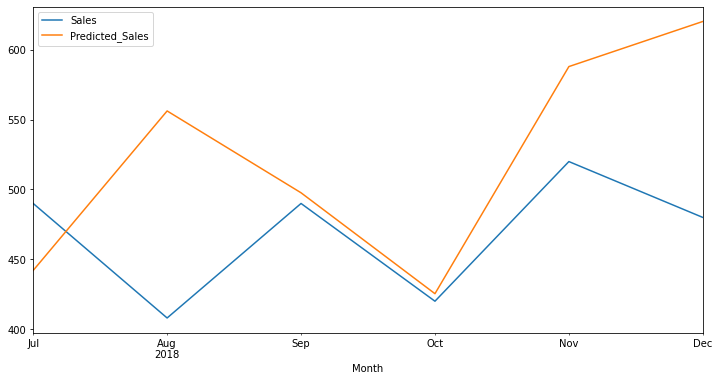

In [27]:
test.plot(figsize=(12,6))

# Calculate error line by line between sales and predicted sales as percentage in test data

In [28]:
def error_function(df,column_1,column_2):
    data = df.copy()
    my_list = []
    for i in range(len(data)):
        x = (data[column_2][i]*100)/data[column_1][i]
        if x >= 100:
            error = x-100
            #data['error_percentage'][i] = error
            my_list.append(error)
        else:
            error = 100-x
            my_list.append(error)
            #data['error_percentage'][i] = error
    data['error_percentage'] = my_list
    return data

In [29]:
column_1 = 'Sales'
column_2 = 'Predicted_Sales'
df_new = error_function(test,column_1,column_2)

In [30]:
df_new

,Sales,Predicted_Sales,error_percentage
Month,,,
2018-07-31,490,442.049744,9.785767
2018-08-31,408,556.251770,36.336218
2018-09-30,490,497.647186,1.560650
2018-10-31,420,425.393890,1.284260
2018-11-30,520,588.023743,13.081489
2018-12-31,480,620.327820,29.234962


# Find the average error

In [31]:
def mean_error(df,error_column):
    total = 0
    for i in range(len(df)):
        total += df[error_column][i]
    mean_error_ = total/(len(df))
    return mean_error_

In [32]:
error_rate = mean_error(df_new,'error_percentage')

In [33]:
error_rate

15.213891009777749

**If we want see how many cars sold in reality, and how much we predicted. Then, we'll find the percentage error.**

In [34]:
sum_of_actual_sales = sum(df_new.Sales.values)

In [35]:
sum_of_actual_sales

2808

In [36]:
sum_of_predicted_sales = sum(df_new.Predicted_Sales.values)

In [37]:
sum_of_predicted_sales

3129.6941528320312

In [38]:
rate_of_actual_and_predict_sums = (sum_of_predicted_sales*100)/sum_of_actual_sales

In [39]:
if rate_of_actual_and_predict_sums >= 100:
    total_percentage = rate_of_actual_and_predict_sums - 100
else:
    total_percentage = 100-rate_of_actual_and_predict_sums

In [40]:
print('Percentage error: ',total_percentage)

Percentage error:  11.45634447407518
